In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [2]:
def produce_random_gps(show=False):
    n = 10

    max_ = 0.3
    min_ = -max_

    longitude = np.random.normal(loc=0, scale=max_, size=n)
    latitude = np.random.normal(loc=0, scale=max_, size=n)
    gps = np.zeros((n, 2))
    gps[:, 0] = longitude
    gps[:, 1] = latitude
    
    if show:
        plt.scatter(gps[:, 0], gps[:, 1])
        plt.xlim(min_*3, max_*3)
        plt.ylim(min_*3, max_*3)
        plt.grid(True)
        plt.show()
    
    return gps

In [3]:
def produce_gps_request():
    gps = produce_random_gps(True)
    gps_request = {"gps_data": []}
    for i, g in enumerate(gps):
        gps_data_ = {
            "gps_id": -1,
            "longitude": -1,
            "latitude": -1,
        }
        gps_data_["gps_id"] = i + np.random.randint(500)
        gps_data_["longitude"] = g[0] * 20 + 130
        gps_data_["latitude"] = g[1] *  15 + 30
        gps_request["gps_data"].append(gps_data_)
    return gps_request

In [4]:
def request2numpy(gps_request):
    gps_data = gps_request["gps_data"]
    gps_data_numpy = np.zeros((len(gps_data), 3))
    for i, g in enumerate(gps_data):
        gps_data_numpy[i, 0] = g["gps_id"]
        gps_data_numpy[i, 1] = g["longitude"]
        gps_data_numpy[i:, 2] = g["latitude"]
    return gps_data_numpy

In [5]:
def produce_fake_gps_data(gps_data):
    n = len(gps_data)
    fake_n = 50
    new_gps = np.zeros((n * fake_n, 2))
    # new_gps = np.array((n , 2))
    for i in range(n):
        new_x = np.random.normal(loc=(gps_data[i, 1:3]), scale=(1, 1), size=(fake_n, 2))
    #     new_gps = np.concatenate([new_gps, new_x])
        new_gps[i*fake_n: (i+1)*fake_n, :] = new_x
    return new_gps

In [6]:
def request2response(request_gps_data, show=False):
    gps_data = request2numpy(request_gps_data)
    n = len(gps_data)
    new_gps = produce_fake_gps_data(gps_data)
    gps = gps_data[:, 1:3]

    # Gaussian Mixture Model
    best_bic = np.inf
    best_n_components = -1
    for i in range(n+1):
        if i == 0:
            continue
        gmm = GaussianMixture(n_components=i, covariance_type="full").fit(new_gps)
        bic = gmm.bic(new_gps)
        if bic < best_bic:
            best_bic = bic
            best_n_components = i

    gmm = GaussianMixture(n_components=best_n_components).fit(new_gps)

    if show:
        label = gmm.predict(new_gps)
        for i in set(label):
            _gps = new_gps[label==i]
            plt.scatter(_gps[:, 0], _gps[:, 1], label=i)
        # plt.xlim(min_*2, max_*2)
        # plt.ylim(min_*2, max_*2)
        plt.grid(True)
        plt.legend()
        plt.show()

    label = gmm.predict(gps)
    used_label= list(set(label))
    label2coo = {}
    for i in used_label:
        mean = gps[label == i].mean(axis=0)
        label2coo[i] = mean

    if show:
        ## REAL DATA ##
        plt.title("REAL GPS Data")
        plt.scatter(gps[:, 0], gps[:, 1])
        plt.grid(True)
        plt.show()

        plt.title("Clustering GPS Data")
        for i in set(label):
            _gps = gps[label==i]
            plt.scatter(_gps[:, 0], _gps[:, 1], label=i)
        plt.grid(True)
        plt.legend()
        plt.show()

        plt.title("Center of Clustering GPS Data")
        for i in used_label:
            mean = label2coo[i]
            plt.scatter(mean[0], mean[1], label=np.arange(best_n_components)[i])
        plt.grid(True)
        plt.legend()
        plt.show()
        
    
    response_gps_data = {"cluster_data": []}
    for i in used_label:
        gps_data_ = {
            "cluster_id": -1,
            "gps_id_belongs_to": [],
            "mean_longitude": -1,
            "mean_latitude": -1
        }
        gps_data_["cluster_id"] = int(i)
        gps_data_["gps_id_belongs_to"] = [int(gps_id) for gps_id in gps_data[label == i][:, 0]]
        gps_data_["mean_longitude"] = float(label2coo[i][0])
        gps_data_["mean_latitude"] = float(label2coo[i][1])
        response_gps_data["cluster_data"].append(gps_data_)
        
    return response_gps_data

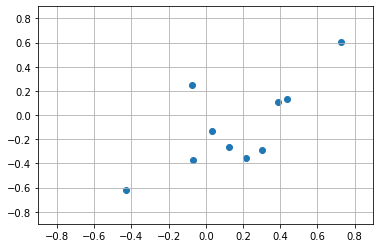

In [7]:
request_gps_data = produce_gps_request()

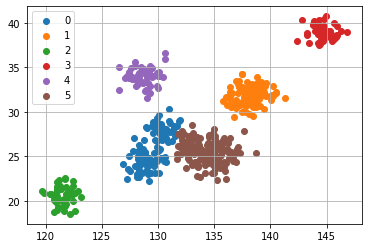

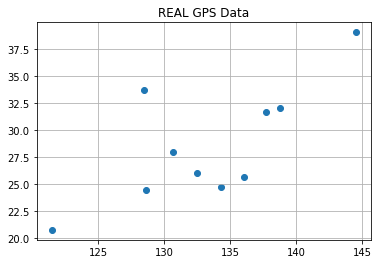

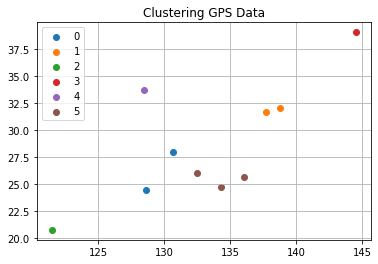

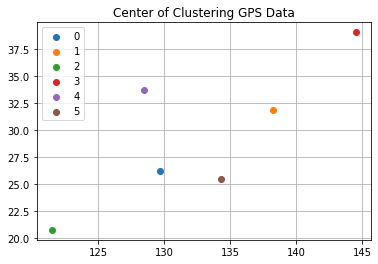

In [8]:
response_gps_data = request2response(request_gps_data, True)

In [245]:
request_gps_data

{'gps_data': [{'gps_id': 424,
   'longitude': 132.38861502919835,
   'latitude': 43.00436700090802},
  {'gps_id': 389,
   'longitude': 133.5891858797156,
   'latitude': 35.665700639220944},
  {'gps_id': 20,
   'longitude': 136.08714991746174,
   'latitude': 30.212420358410892},
  {'gps_id': 166,
   'longitude': 127.38447796682586,
   'latitude': 27.23870422508873},
  {'gps_id': 237,
   'longitude': 135.41421478795212,
   'latitude': 23.184136057365226},
  {'gps_id': 247,
   'longitude': 131.70886712534687,
   'latitude': 30.574323680904243},
  {'gps_id': 9,
   'longitude': 127.70655777737329,
   'latitude': 28.945129015849005},
  {'gps_id': 316,
   'longitude': 124.06195972613097,
   'latitude': 32.45786400186775},
  {'gps_id': 64,
   'longitude': 145.73610932106251,
   'latitude': 30.152256972384553},
  {'gps_id': 211,
   'longitude': 131.87341225787605,
   'latitude': 31.91785658296999}]}

In [243]:
response_gps_data

{'cluster_data': [{'cluster_id': 0,
   'gps_id_belongs_to': [166, 9],
   'mean_longitude': 127.54551787209957,
   'mean_latitude': 28.091916620468865},
  {'cluster_id': 1,
   'gps_id_belongs_to': [247, 211],
   'mean_longitude': 131.79113969161148,
   'mean_latitude': 31.246090131937116},
  {'cluster_id': 2,
   'gps_id_belongs_to': [64],
   'mean_longitude': 145.73610932106251,
   'mean_latitude': 30.152256972384553},
  {'cluster_id': 3,
   'gps_id_belongs_to': [424],
   'mean_longitude': 132.38861502919835,
   'mean_latitude': 43.00436700090802},
  {'cluster_id': 4,
   'gps_id_belongs_to': [316],
   'mean_longitude': 124.06195972613097,
   'mean_latitude': 32.45786400186775},
  {'cluster_id': 5,
   'gps_id_belongs_to': [237],
   'mean_longitude': 135.41421478795212,
   'mean_latitude': 23.184136057365226},
  {'cluster_id': 6,
   'gps_id_belongs_to': [20],
   'mean_longitude': 136.08714991746174,
   'mean_latitude': 30.212420358410892},
  {'cluster_id': 7,
   'gps_id_belongs_to': [389]